# Setup

In [ ]:
%tensorflow_version 1.x
! pip install scipy==1.1.0
! export TF_CUDNN_USE_AUTOTUNE=0

TensorFlow 1.x selected.
     |████████████████████████████████| 31.2MB 107kB/s 
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [ ]:
! gcloud auth login

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=soP2Oh6QMBooUbGHtYeZmx3rFOWEQe&prompt=consent&access_type=offline&code_challenge=j4O6CO2-lvAVaXK3Oq8lRzK2mA96deHdeIU-gz11ljg&code_challenge_method=S256

Enter verification code: 4/1AY0e-g5iX3re8A_WEZDIU3D0cxRdEQwwvZhfjc9T89U0-EGDU00XMXVeReM

You are now logged in as [telfer006@gmail.com].
Your current project is [None].  You can change this setting by running:
  $ gcloud config set project PROJECT_ID


In [ ]:
! git clone https://github.com/eldar/pose-tensorflow.git
%cd pose-tensorflow/

Cloning into 'pose-tensorflow'...
remote: Enumerating objects: 295, done.
remote: Total 295 (delta 0), reused 0 (delta 0), pack-reused 295
Receiving objects: 100% (295/295), 1.54 MiB | 26.32 MiB/s, done.
Resolving deltas: 100% (82/82), done.
/content/pose-tensorflow


In [ ]:
! gsutil ls gs://comp5900f/models

gs://comp5900f/models/centered-xxs/
gs://comp5900f/models/centered/
gs://comp5900f/models/rescale-1-over-4-xxs/
gs://comp5900f/models/rescale-1-over-4/
gs://comp5900f/models/scale-1-over-4-xxs/
gs://comp5900f/models/scale-1-over-4/
gs://comp5900f/models/srgan-1-over-4-xxs/
gs://comp5900f/models/srgan-1-over-4/


In [ ]:
! gsutil ls gs://comp5900f/data/

gs://comp5900f/data/dataset-centered-rescaled-1-over-4.mat
gs://comp5900f/data/dataset-centered-srgan-1-over-4.mat
gs://comp5900f/data/dataset-centered.mat
gs://comp5900f/data/centered-rescaled-1-over-4/
gs://comp5900f/data/centered-srgan-1-over-4/
gs://comp5900f/data/centered-srgan-1-over-8/
gs://comp5900f/data/centered/
gs://comp5900f/data/centered_scale-1-over-4/
gs://comp5900f/data/centered_scale-1-over-8/
gs://comp5900f/data/datasets/
gs://comp5900f/data/train-test-splits/


In [ ]:
! gsutil -m cp -r gs://comp5900f/models/* ./models

In [ ]:
! gsutil -m cp -r gs://comp5900f/data/centered-rescaled-1-over-4 ./images
! gsutil -m cp -r gs://comp5900f/data/centered_scale-1-over-4 ./images
! gsutil -m cp -r gs://comp5900f/data/centered-srgan-1-over-4 ./images
! gsutil -m cp -r gs://comp5900f/data/centered/ ./images

Copying gs://comp5900f/data/centered-rescaled-1-over-4/000225.png...
Copying gs://comp5900f/data/centered-rescaled-1-over-4/000224.png...
Copying gs://comp5900f/data/centered-rescaled-1-over-4/000229.png...
Copying gs://comp5900f/data/centered-rescaled-1-over-4/000230.png...
Copying gs://comp5900f/data/centered-rescaled-1-over-4/000231.png...
Copying gs://comp5900f/data/centered-rescaled-1-over-4/000226.png...
Copying gs://comp5900f/data/centered-rescaled-1-over-4/000227.png...
Copying gs://comp5900f/data/centered-rescaled-1-over-4/000232.png...
Copying gs://comp5900f/data/centered-rescaled-1-over-4/000228.png...
Copying gs://comp5900f/data/centered-rescaled-1-over-4/000233.png...
Copying gs://comp5900f/data/centered-rescaled-1-over-4/000234.png...
Copying gs://comp5900f/data/centered-rescaled-1-over-4/000236.png...
Copying gs://comp5900f/data/centered-rescaled-1-over-4/000235.png...
Copying gs://comp5900f/data/centered-rescaled-1-over-4/000237.png...
Copying gs://comp5900f/data/center

In [ ]:
! gsutil -m cp -r gs://comp5900f/data/train-test-splits .

Copying gs://comp5900f/data/train-test-splits/test_ids-xxs.txt...
Copying gs://comp5900f/data/train-test-splits/test_ids.txt...
Copying gs://comp5900f/data/train-test-splits/train_ids-xxs.txt...
Copying gs://comp5900f/data/train-test-splits/train_ids.txt...
/ [4/4 files][ 18.0 KiB/ 18.0 KiB] 100% Done                                    
Operation completed over 4 objects/18.0 KiB.                                     


In [ ]:
ls models

centered/            pretrained/            scale-1-over-4-xxs/
centered-xxs/        README.md              srgan-1-over-4/
coco/                rescale-1-over-4/      srgan-1-over-4-xxs/
dataset_example.mat  rescale-1-over-4-xxs/
mpii/                scale-1-over-4/


# Explore

In [ ]:
from util.config import load_config
from nnet import predict
from dataset.pose_dataset import data_to_input
import tensorflow as tf

tf.keras.backend.clear_session() 

model_name = 'scale-1-over-4'
cfg = load_config(f"models/{model_name}/train/pose_cfg.yaml")
cfg['init_weights'] = f'./models/{model_name}/train/snapshot-500000'
sess, inputs, outputs = predict.setup_pose_prediction(cfg)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Please use `layer.__call__` method instead.


INFO:tensorflow:Restoring parameters from ./models/scale-1-over-4/train/snapshot-500000


INFO:tensorflow:Restoring parameters from ./models/scale-1-over-4/train/snapshot-500000


In [ ]:
import numpy as np
from PIL import Image

img = Image.open('/content/pose-tensorflow/images/centered/000224.png')
img = np.array(img)
image_batch = data_to_input(img)

image_batch.shape

FileNotFoundError: ignored

In [ ]:
%%time
# Compute prediction with the CNN
outputs_np = sess.run(outputs, feed_dict={inputs: image_batch})
scmap, locref, _ = predict.extract_cnn_output(outputs_np, cfg)

# Extract maximum scoring location from the heatmap, assume 1 person
pose = predict.argmax_pose_predict(scmap, locref, cfg.stride)

CPU times: user 38.2 ms, sys: 14.4 ms, total: 52.6 ms
Wall time: 47.8 ms


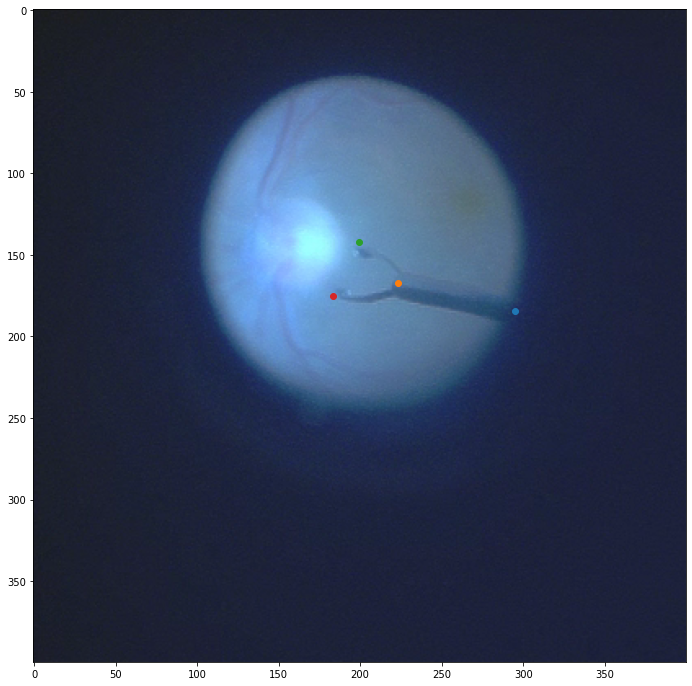

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for x, y, conf in pose:
  plt.scatter(x, y)
plt.imshow(img)

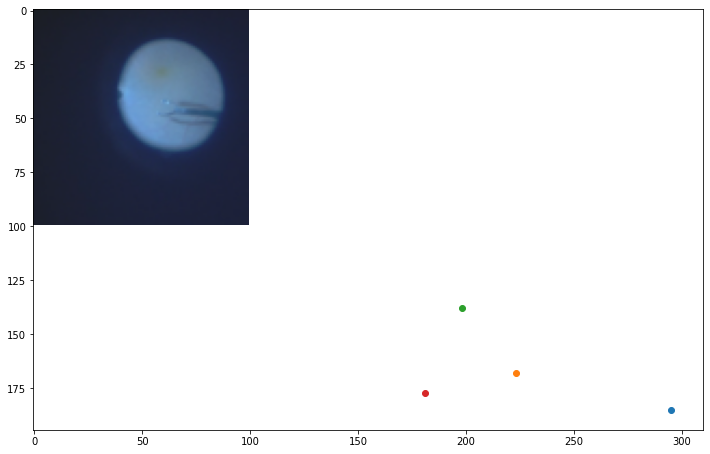

In [ ]:
import pandas as pd

df = pd.read_csv('./images/centered/annotations.csv', dtype={'image_id': str})
df = df.set_index('image_id')

x_cols = [col for col in df.columns if '_x' in col]
y_cols = [col for col in df.columns if '_y' in col]

true = df.loc['000224']
true_x = true[x_cols].values
true_y = true[y_cols].values

plt.figure(figsize=(12, 12))
plt.imshow(img)
for x, y in zip(true_x, true_y):
  plt.scatter(x, y)

In [ ]:
pose

array([[294.99282289, 184.66304874,   1.        ],
       [223.34323978, 167.32313538,   1.        ],
       [199.34791279, 142.21575189,   1.        ],
       [183.55590487, 174.93991661,   1.        ]])

In [ ]:
import os
from glob import glob

imageset = 'centered_scale-1-over-4'

parts = ['shaft_start', 'shaft_end', 'tip_1', 'tip_2']
predictions = pd.DataFrame()

image_files = glob(f'./images/{imageset}/*.png')
for image_index, image_file in enumerate(image_files):
  print(f'\r{image_index+1}/{len(image_files)}', end='')
  id = os.path.splitext(os.path.split(image_file)[1])[0]
  img = Image.open(image_file)
  image_batch = data_to_input(np.array(img))
  # img = np.array(img).astype(np.float64)
  # img = np.expand_dims(img, 0)
  
  outputs_np = sess.run(outputs, feed_dict={inputs: image_batch})
  scmap, locref, _ = predict.extract_cnn_output(outputs_np, cfg)
  pose = predict.argmax_pose_predict(scmap, locref, cfg.stride)

  s = pd.Series()
  s['image_id'] = id
  for idx, part in enumerate(parts):
    x, y, likelihood = pose[idx]
    s[part+'_x'] = x
    s[part+'_y'] = y
    s[part+'_likelihood'] = likelihood

  predictions = predictions.append(s, ignore_index=True)

predictions = predictions.set_index('image_id')
predictions_file = f'results-{model_name}-on-{imageset}.csv'
predictions.to_csv(predictions_file)


6/1155

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


1155/1155

In [ ]:
! gsutil cp 

In [ ]:
pd.read_csv(predictions_file, dtype={'image_id': str}).sample(3)

,image_id,shaft_end_likelihood,shaft_end_x,shaft_end_y,shaft_start_likelihood,shaft_start_x,shaft_start_y,tip_1_likelihood,tip_1_x,tip_1_y,tip_2_likelihood,tip_2_x,tip_2_y
277,001612,1.0,47.081033,53.015863,1.0,69.286806,68.918333,1.0,36.942369,41.750447,1.0,31.029191,46.515962
896,000466,1.0,47.162915,45.991976,1.0,80.161992,52.684129,1.0,40.931530,39.512620,1.0,37.996922,46.202376
874,001962,1.0,71.700193,46.646008,1.0,80.252020,51.540175,1.0,62.350167,32.081862,1.0,53.616855,39.457632


In [ ]:
! gsutil -m cp -r gs://comp5900f/data/train-test-splits .
test_ids = np.genfromtxt(f'train-test-splits/test_ids-xxs.txt', dtype=str)
train_ids = np.genfromtxt(f'train-test-splits/train_ids-xxs.txt', dtype=str)

Copying gs://comp5900f/data/train-test-splits/test_ids-xxs.txt...
Copying gs://comp5900f/data/train-test-splits/train_ids-xxs.txt...
Copying gs://comp5900f/data/train-test-splits/test_ids.txt...
Copying gs://comp5900f/data/train-test-splits/train_ids.txt...
/ [4/4 files][ 18.0 KiB/ 18.0 KiB] 100% Done                                    
Operation completed over 4 objects/18.0 KiB.                                     


In [ ]:
errors = []
for test_id in test_ids:
  pred = predictions.loc[test_id]
  true = df.loc[test_id]

  pred_x = pred[x_cols].values * 4
  pred_y = pred[y_cols].values * 4

  true_x = true[x_cols].values
  true_y = true[y_cols].values
  
  a = np.array([pred_x, pred_y]).T
  b = np.array([true_x, true_y]).T

  errors.append(np.linalg.norm(a - b, axis=1))

errors = np.array(errors)
np.mean(errors)

6.251892266393966

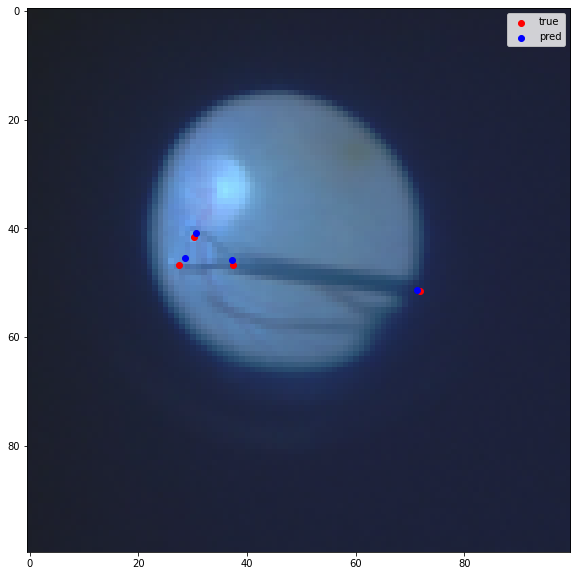

In [ ]:
id = train_ids[10]
pred = predictions.loc[id]
true = df.loc[id]

test = Image.open(f'images/{imageset}/{id}.png')
plt.figure(figsize=(10,10))
plt.imshow(test)
# plt.imshow(img[0].astype(int))

x = true[x_cols].values 
y = true[y_cols].values

y, x = true.values.reshape(-1, 2).T / 4
plt.scatter(x, y, c='r', label='true')

# x, y = pred.values.reshape(-1, 3)[:,:2].T
x = pred[x_cols].values 
y = pred[y_cols].values 
plt.scatter(x, y, c='b', label='pred')

plt.legend()

In [ ]:

pred

shaft_end_likelihood        1.000000
shaft_end_x               223.343240
shaft_end_y               167.323135
shaft_start_likelihood      1.000000
shaft_start_x             294.992823
shaft_start_y             184.663049
tip_1_likelihood            1.000000
tip_1_x                   199.347913
tip_1_y                   142.215752
tip_2_y_likelihood          1.000000
tip_2_y_x                 183.555905
tip_2_y_y                 174.939917
Name: 001699, dtype: float64

# Analyze

In [ ]:
from util.config import load_config
from nnet import predict
from dataset.pose_dataset import data_to_input
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

from glob import glob
from PIL import Image
from dataclasses import dataclass

@dataclass
class Experiment:
  name: str
  imageset: str
  annotations: str
  model: str
  train_ids: str
  test_ids: str
  scale: int = 1
  snapshot: int = 500000

  def ___post_init___(self):
    assert os.path.exists(self.imageset)
    assert os.path.exists(self.annotations)
    assert os.path.exists(self.model)
    assert os.path.exists(self.train_ids)
    assert os.path.exists(self.test_ids)

experiments = [
    Experiment(
        name = 'centered',
        imageset = '/content/pose-tensorflow/images/centered',
        annotations = '/content/pose-tensorflow/images/centered/annotations.csv',
        model = '/content/pose-tensorflow/models/centered/train/pose_cfg.yaml',
        train_ids = '/content/pose-tensorflow/train-test-splits/train_ids.txt',
        test_ids = '/content/pose-tensorflow/train-test-splits/test_ids.txt'
    ),
    Experiment(
        name = 'centered-xxs',
        imageset = '/content/pose-tensorflow/images/centered',
        annotations = '/content/pose-tensorflow/images/centered/annotations.csv',
        model = '/content/pose-tensorflow/models/centered-xxs/train/pose_cfg.yaml',
        train_ids = '/content/pose-tensorflow/train-test-splits/train_ids-xxs.txt',
        test_ids = '/content/pose-tensorflow/train-test-splits/test_ids-xxs.txt',
        snapshot = 400000
    ),
    Experiment(
        name = 'rescaled',
        imageset = '/content/pose-tensorflow/images/centered-rescaled-1-over-4',
        annotations = '/content/pose-tensorflow/images/centered/annotations.csv',
        model = '/content/pose-tensorflow/models/rescale-1-over-4/train/pose_cfg.yaml',
        train_ids = '/content/pose-tensorflow/train-test-splits/train_ids.txt',
        test_ids = '/content/pose-tensorflow/train-test-splits/test_ids.txt'
    ),
    Experiment(
        name = 'srgan',
        imageset = '/content/pose-tensorflow/images/centered-srgan-1-over-4',
        annotations = '/content/pose-tensorflow/images/centered/annotations.csv',
        model = '/content/pose-tensorflow/models/srgan-1-over-4/train/pose_cfg.yaml',
        train_ids = '/content/pose-tensorflow/train-test-splits/train_ids.txt',
        test_ids = '/content/pose-tensorflow/train-test-splits/test_ids.txt'
    ),
    Experiment(
        name = 'scaled',
        imageset = '/content/pose-tensorflow/images/centered_scale-1-over-4',
        annotations = '/content/pose-tensorflow/images/centered/annotations.csv',
        model = '/content/pose-tensorflow/models/scale-1-over-4/train/pose_cfg.yaml',
        train_ids = '/content/pose-tensorflow/train-test-splits/train_ids.txt',
        test_ids = '/content/pose-tensorflow/train-test-splits/test_ids.txt',
        scale = 4
    ),
    Experiment(
        name = 'rescaled-xxs',
        imageset = '/content/pose-tensorflow/images/centered-rescaled-1-over-4',
        annotations = '/content/pose-tensorflow/images/centered/annotations.csv',
        model = '/content/pose-tensorflow/models/rescale-1-over-4-xxs/train/pose_cfg.yaml',
        train_ids = '/content/pose-tensorflow/train-test-splits/train_ids-xxs.txt',
        test_ids = '/content/pose-tensorflow/train-test-splits/test_ids-xxs.txt'
    ),
    Experiment(
        name = 'srgan-xxs',
        imageset = '/content/pose-tensorflow/images/centered-srgan-1-over-4',
        annotations = '/content/pose-tensorflow/images/centered/annotations.csv',
        model = '/content/pose-tensorflow/models/srgan-1-over-4-xxs/train/pose_cfg.yaml',
        train_ids = '/content/pose-tensorflow/train-test-splits/train_ids-xxs.txt',
        test_ids = '/content/pose-tensorflow/train-test-splits/test_ids-xxs.txt'
    ),
    Experiment(
        name = 'scaled-xxs',
        imageset = '/content/pose-tensorflow/images/centered_scale-1-over-4',
        annotations = '/content/pose-tensorflow/images/centered/annotations.csv',
        model = '/content/pose-tensorflow/models/scale-1-over-4-xxs/train/pose_cfg.yaml',
        train_ids = '/content/pose-tensorflow/train-test-splits/train_ids-xxs.txt',
        test_ids = '/content/pose-tensorflow/train-test-splits/test_ids-xxs.txt',
        scale = 4
    ),
]

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
! rm -rf ./results
! mkdir ./results

parts = ['shaft_start', 'shaft_end', 'tip_1', 'tip_2']
x_cols = [col + '_x' for col in parts]
y_cols = [col + '_y' for col in parts]
likelihood_cols = [col + '_likelihood' for col in parts]

for experiment in experiments:
  print(experiment.name)
  tf.keras.backend.clear_session() 
  cfg = load_config(experiment.model)
  cfg['init_weights'] = f'{os.path.split(experiment.model)[0]}/snapshot-{experiment.snapshot}'
  sess, inputs, outputs = predict.setup_pose_prediction(cfg)

  test_ids = np.genfromtxt(experiment.test_ids, dtype=str)
  train_ids = np.genfromtxt(experiment.train_ids, dtype=str)

  df = pd.read_csv(experiment.annotations, dtype={'image_id': str})
  df = df.set_index('image_id')
  
  # PREDICT
  predictions = pd.DataFrame()
  image_files = glob(f'{experiment.imageset}/*.png')
  for image_file in image_files:
    id = os.path.splitext(os.path.split(image_file)[1])[0]
    img = Image.open(image_file)
    image_batch = data_to_input(np.array(img))

    outputs_np = sess.run(outputs, feed_dict={inputs: image_batch})
    scmap, locref, _ = predict.extract_cnn_output(outputs_np, cfg)
    pose = predict.argmax_pose_predict(scmap, locref, cfg.stride)

    s = pd.Series()
    s['image_id'] = id
    for idx, part in enumerate(parts):
      x, y, likelihood = pose[idx]
      s[part+'_x'] = x
      s[part+'_y'] = y
      s[part+'_likelihood'] = likelihood

    predictions = predictions.append(s, ignore_index=True)

  predictions = predictions.set_index('image_id')

  errors = []
  likelihoods = []
  for test_id in test_ids:
    pred = predictions.loc[test_id]
    true = df.loc[test_id]

    pred_x = pred[x_cols].values 
    pred_y = pred[y_cols].values 

    true_x = true[x_cols].values
    true_y = true[y_cols].values
    
    a = np.array([pred_x, pred_y]).T * experiment.scale
    b = np.array([true_x, true_y]).T 

    errors.append(np.linalg.norm(a - b, axis=1))

  likelihoods = predictions[likelihood_cols].loc[test_ids]
  errors = np.array(errors)
  errors = pd.DataFrame(errors, columns=parts, index=test_ids)
  errors.index.name = 'image_id'

  
  base_path = f'./results/results-{experiment.name}'
  predictions.to_csv(f'{base_path}-predictions.csv')
  likelihoods.to_csv(f'{base_path}-likelihoods.csv')
  errors.to_csv(f'{base_path}-errors.csv')

centered



Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Please use `layer.__call__` method instead.


INFO:tensorflow:Restoring parameters from /content/pose-tensorflow/models/centered/train/snapshot-500000


INFO:tensorflow:Restoring parameters from /content/pose-tensorflow/models/centered/train/snapshot-500000
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


centered-xxs
INFO:tensorflow:Restoring parameters from /content/pose-tensorflow/models/centered-xxs/train/snapshot-400000


INFO:tensorflow:Restoring parameters from /content/pose-tensorflow/models/centered-xxs/train/snapshot-400000


rescaled
INFO:tensorflow:Restoring parameters from /content/pose-tensorflow/models/rescale-1-over-4/train/snapshot-500000


INFO:tensorflow:Restoring parameters from /content/pose-tensorflow/models/rescale-1-over-4/train/snapshot-500000


srgan
INFO:tensorflow:Restoring parameters from /content/pose-tensorflow/models/srgan-1-over-4/train/snapshot-500000


INFO:tensorflow:Restoring parameters from /content/pose-tensorflow/models/srgan-1-over-4/train/snapshot-500000


scaled
INFO:tensorflow:Restoring parameters from /content/pose-tensorflow/models/scale-1-over-4/train/snapshot-500000


INFO:tensorflow:Restoring parameters from /content/pose-tensorflow/models/scale-1-over-4/train/snapshot-500000


rescaled-xxs
INFO:tensorflow:Restoring parameters from /content/pose-tensorflow/models/rescale-1-over-4-xxs/train/snapshot-500000


INFO:tensorflow:Restoring parameters from /content/pose-tensorflow/models/rescale-1-over-4-xxs/train/snapshot-500000


srgan-xxs
INFO:tensorflow:Restoring parameters from /content/pose-tensorflow/models/srgan-1-over-4-xxs/train/snapshot-500000


INFO:tensorflow:Restoring parameters from /content/pose-tensorflow/models/srgan-1-over-4-xxs/train/snapshot-500000


scaled-xxs
INFO:tensorflow:Restoring parameters from /content/pose-tensorflow/models/scale-1-over-4-xxs/train/snapshot-500000


INFO:tensorflow:Restoring parameters from /content/pose-tensorflow/models/scale-1-over-4-xxs/train/snapshot-500000


### Overall Errors

In [ ]:
error_files = sorted(glob('./results/*-errors.csv'))
likelihood_files = sorted(glob('./results/*-likelihoods.csv'))


values = []
for error_file, likelihood_file in zip(error_files, likelihood_files):
  errors = pd.read_csv(error_file, dtype={'image_id': str})
  errors = errors.set_index('image_id')

  likelihoods = pd.read_csv(likelihood_file, dtype={'image_id': str})
  likelihoods = likelihoods.set_index('image_id')

  errors = errors / 4
  # cutoff = 1
  # errors = errors[(likelihoods >= cutoff).values]
  e = np.mean(errors.values)
  ee = np.std(errors.values) / np.sqrt(np.product(errors.shape))
  values.append(f'{e:.3f} +/- {ee:.3f}')

values = np.array(values).reshape(-1, 2)
values = values[[0, 1, 3, 2]]
out = pd.DataFrame(values, columns=['70:30', '50 vs Rest'], index=['Upper Bound', 'Scaled', 'SR', 'Lower Bound'])

out.columns.name = 'Train/Test Split'
out.index.name = 'Pipeline'
out

Train/Test Split,70:30,50 vs Rest
Pipeline,,
Upper Bound,0.668 +/- 0.012,1.159 +/- 0.037
Scaled,0.684 +/- 0.012,1.037 +/- 0.028
SR,0.686 +/- 0.012,1.095 +/- 0.032
Lower Bound,1.581 +/- 0.024,2.621 +/- 0.025


In [ ]:
error_files = sorted(glob('./results/*-errors.csv'))
likelihood_files = sorted(glob('./results/*-likelihoods.csv'))

values = []
for error_file, likelihood_file in zip(error_files, likelihood_files):
  errors = pd.read_csv(error_file, dtype={'image_id': str})
  errors = errors.set_index('image_id')

  likelihoods = pd.read_csv(likelihood_file, dtype={'image_id': str})
  likelihoods = likelihoods.set_index('image_id')

  errors = errors / 4
  cutoff = 1
  errors = errors[(likelihoods >= cutoff).values]
  values.append(f'{np.max(errors.values):.3f}')

values = np.array(values).reshape(-1, 2)
values = values[[0, 1, 3, 2]]
out = pd.DataFrame(values, columns=['70:30', '50 vs Rest'], index=['Upper Bound', 'Scaled', 'SR', 'Lower Bound'])

out.columns.name = 'Train/Test Split'
out.index.name = 'Pipeline'
out

Train/Test Split,70:30,50 vs Rest
Pipeline,,
Upper Bound,4.985,32.776
Scaled,6.146,50.515
SR,4.305,35.025
Lower Bound,6.264,11.147


# Check correlation between SR pixel error and pose estimation error

We take a 9x9 area around the true position 

In [ ]:

for experiment in filter(lambda x: 'srgan' in x.name, experiments):
  predictions = pd.read_csv(f'./results/results-{experiment.name}-predictions.csv', dtype={'image_id': str})
  predictions = predictions.set_index('image_id')

  annotations = pd.read_csv(experiment.annotations, dtype={'image_id': str})
  annotations = annotations.set_index('image_id')

  errors = pd.read_csv(f'./results/results-{experiment.name}-errors.csv', dtype={'image_id': str})
  errors = errors.set_index('image_id')

  test_ids = np.genfromtxt(experiment.test_ids, dtype=str)
  pixel_mse_true = pd.DataFrame()
  pixel_mse_pred = pd.DataFrame()

  for test_id in test_ids:
    pred = predictions.loc[test_id]
    true = annotations.loc[test_id]

    pixel_mse_true_frame = []
    pixel_mse_pred_frame = []
    for part in parts:
      pred_x = pred[part + '_x'].astype(int)
      pred_y = pred[part + '_y'].astype(int)
      true_x = true[part + '_x'].astype(int)
      true_y = true[part + '_y'].astype(int)

      hr_img = Image.open(f'/content/pose-tensorflow/images/centered/{test_id}.png')
      sr_img = Image.open(experiment.imageset + f'/{test_id}.png')

      hr_img = np.array(hr_img)
      sr_img = np.array(sr_img)

      # higher limit has +1 as python indexing is [lower, upper)
      r = 11
      upper = int(r/2)+1
      lower = int(r/2)
      true_slice_index = np.s_[true_x-lower:true_x+upper, true_y-lower: true_y+upper]
      pred_slice_index = np.s_[pred_x-lower:pred_x+upper, pred_y-lower: pred_y+upper]

      # Here we get the MSE of each pixel, then sum them.
      diff = hr_img[true_slice_index] - sr_img[true_slice_index]
      mse = np.sqrt(np.sum(np.square(diff), axis=2)) / diff.shape[2]
      pixel_mse_true_frame.append(np.sum(mse))

      diff = hr_img[pred_slice_index] - sr_img[pred_slice_index]
      mse = np.sqrt(np.sum(np.square(diff), axis=2)) / diff.shape[2]
      pixel_mse_pred_frame.append(np.sum(mse))
    
    pixel_mse_true_frame = pd.Series(pixel_mse_true_frame, index=parts, name=test_id)
    pixel_mse_pred_frame = pd.Series(pixel_mse_pred_frame, index=parts, name=test_id)
    
    pixel_mse_true = pixel_mse_true.append(pixel_mse_true_frame)
    pixel_mse_pred = pixel_mse_pred.append(pixel_mse_pred_frame)
    
  print('experiment', experiment.name)
  print('true pixel error')
  for part in parts:
    print(part)
    print(np.corrcoef(pixel_mse_true[part], errors[part]))
    print()

  print('pred pixel error')
  for part in parts:
    print(part)
    print(np.corrcoef(pixel_mse_pred[part], errors[part]))
    print()

experiment srgan
true pixel error
shaft_start
[[ 1.         -0.09950596]
 [-0.09950596  1.        ]]

shaft_end
[[ 1.         -0.07912683]
 [-0.07912683  1.        ]]

tip_1
[[ 1.         -0.07365974]
 [-0.07365974  1.        ]]

tip_2
[[ 1.         -0.12641898]
 [-0.12641898  1.        ]]

pred pixel error
shaft_start
[[ 1.         -0.03701696]
 [-0.03701696  1.        ]]

shaft_end
[[ 1.         -0.06468637]
 [-0.06468637  1.        ]]

tip_1
[[ 1.         -0.08747294]
 [-0.08747294  1.        ]]

tip_2
[[ 1.        -0.1290306]
 [-0.1290306  1.       ]]

experiment srgan-xxs
true pixel error
shaft_start
[[ 1.         -0.22005832]
 [-0.22005832  1.        ]]

shaft_end
[[1.         0.09550359]
 [0.09550359 1.        ]]

tip_1
[[ 1.         -0.00269333]
 [-0.00269333  1.        ]]

tip_2
[[ 1.         -0.11531561]
 [-0.11531561  1.        ]]

pred pixel error
shaft_start
[[ 1.         -0.16139895]
 [-0.16139895  1.        ]]

shaft_end
[[1.00000000e+00 4.18724273e-04]
 [4.18724273e-04 

In [ ]:
pixel_mse_pred

shaft_start    [[2.3570226039551585, 3.858612300930075, 4.818...
shaft_end      [[1.0, 1.247219128924647, 3.448026810929534, 1...
tip_1          [[3.2317865716108862, 0.8164965809277259, 4.81...
tip_2          [[2.3804761428476167, 3.958114029012639, 6.489...
Name: 001441, dtype: object

In [ ]:
pixel_mse_true

,shaft_end,shaft_start,tip_1,tip_2
001726,13.227603,15.096889,15.826300,23.146235
001955,20.945665,17.530593,15.613841,29.926571
001788,18.731118,9.334658,12.981910,11.018086
002003,30.623567,24.261100,16.495679,17.659771
000599,10.840939,10.494503,8.124333,8.781793
...,...,...,...,...
000303,9.262217,11.738998,13.291613,5.505793
002019,19.272169,15.485359,23.607387,18.562336
001430,21.074384,23.700713,34.963535,45.636029
001533,20.292626,23.274493,32.925434,43.732019


### Bodypart Error Correlations

true pixel error
shaft_start
[[ 1.         -0.09950596]
 [-0.09950596  1.        ]]

shaft_end
[[ 1.         -0.07912683]
 [-0.07912683  1.        ]]

tip_1
[[ 1.         -0.07365974]
 [-0.07365974  1.        ]]

tip_2
[[ 1.         -0.12641898]
 [-0.12641898  1.        ]]

pred pixel error
shaft_start
[[ 1.         -0.03701696]
 [-0.03701696  1.        ]]

shaft_end
[[ 1.         -0.06468637]
 [-0.06468637  1.        ]]

tip_1
[[ 1.         -0.08747294]
 [-0.08747294  1.        ]]

tip_2
[[ 1.        -0.1290306]
 [-0.1290306  1.       ]]



In [ ]:

np.corrcoef(pixel_mse_true.iloc[:,1], errors.iloc[:,1])

array([[ 1.        , -0.06378514],
       [-0.06378514,  1.        ]])

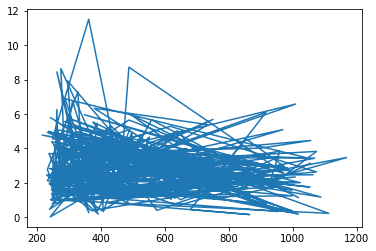

In [ ]:
import matplotlib.pyplot as plt

plt.plot(pixel_mse_pred[part], errors[part])

array([[1.1055416 , 1.05409255, 1.69967317, 2.4267033 , 3.34995854,
        1.69967317, 1.        , 1.52752523, 1.52752523],
       [2.05480467, 0.47140452, 3.34995854, 3.43187671, 1.69967317,
        2.05480467, 1.97202659, 2.13437475, 1.79505494],
       [2.40370085, 1.69967317, 2.7080128 , 2.33333333, 4.5338235 ,
        2.49443826, 1.82574186, 1.52752523, 1.        ],
       [2.82842712, 1.20185043, 2.94392029, 4.06885187, 1.24721913,
        0.57735027, 0.74535599, 3.55902608, 1.20185043],
       [1.45296631, 0.74535599, 1.24721913, 3.23178657, 1.24721913,
        4.45969605, 2.23606798, 1.69967317, 2.44948974],
       [1.94365063, 3.6968455 , 0.94280904, 3.34995854, 3.8586123 ,
        1.1055416 , 1.        , 0.57735027, 1.1055416 ],
       [1.37436854, 2.62466929, 1.41421356, 2.68741925, 2.1602469 ,
        1.20185043, 1.79505494, 1.37436854, 1.1055416 ],
       [1.79505494, 1.56347192, 2.68741925, 2.44948974, 1.37436854,
        1.49071198, 1.52752523, 1.49071198, 4.58257569],


In [ ]:
sr_img[true_slice_index]

TypeError: ignored

In [ ]:
np.array(hr_img)[true_slice_index]

TypeError: ignored

In [ ]:
np.sum(cutoff_errors.values)

77294.59640599656

,shaft_start,shaft_end,tip_1,tip_2
image_id,,,,
001938,5.367222,3.376544,2.953385,3.004774
001938,5.367222,3.376544,2.953385,3.004774
001938,5.367222,3.376544,2.953385,3.004774
001938,5.367222,3.376544,2.953385,3.004774
000224,2.110232,1.169494,11.290650,11.454401
...,...,...,...,...
001447,2.457367,6.158371,4.095971,4.759832
000388,4.395218,1.154450,1.924856,2.407674
000388,4.395218,1.154450,1.924856,2.407674


In [ ]:
likelihood_cols = [col + '_likelihood' for col in parts]
likelihoods = predictions[likelihood_cols].loc[test_ids] 
errors[likelihoods == 1].std(), errors.std()

(1.4165612456147116, 1.8186045392587218)

# Debug